# 2주차 - 2024 고등학생 AI경진대회 제1회 제주

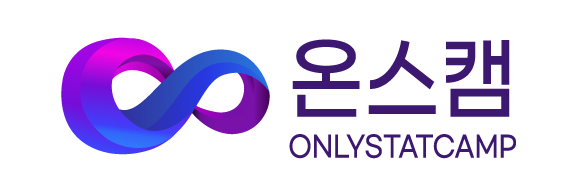

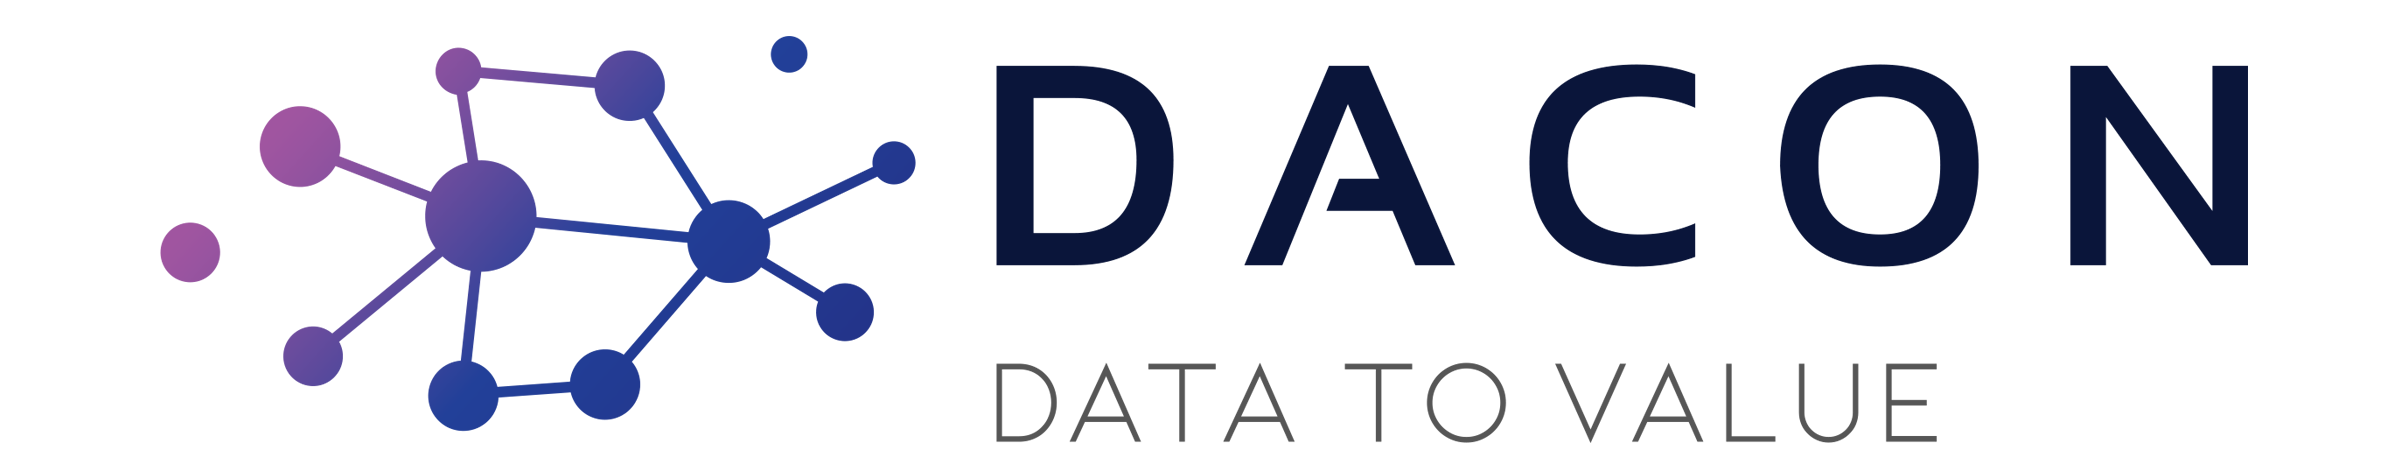

---

In [1]:
import os
import random

In [2]:
import numpy as np
import pandas as pd

In [3]:
from tqdm.auto import tqdm

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [6]:
import tensorflow as tf

2024-01-30 18:29:10.758125: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-30 18:29:11.381668: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvrtc.so.11.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/juing/app/TensorRT-7.2.3.4/lib:/usr/lib/nvidia:/home/juing/.mujoco/mujoco210/bin:/usr/local/cuda-11.2/extras/CUPTI/lib64:/usr/local/cuda-11.2/lib64
2024-01-30 18:29:11.381818: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvrtc.so.11.1: cannot open shared object file: No such file or directory

In [7]:
random.seed(42)
np.random.seed(42)
os.environ['PYTHONHASHSEED'] = "42"

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

---

# 데이터 준비

## 데이터 설명

- train.csv [파일] 
    - ID : 신용카드를 보유한 고객의 고유 ID
    - TARGET : 고객의 신용카드 연체 여부
    - 성별
    - 차량 소유 여부
    - 부동산 소유 여부
    - 자녀 수
    - 연간 수입 : 단위 원
    - 수입 유형
    - 최종 학력
    - 결혼 여부
    - 주거 형태
    - 거주지 인구 비율: 고객이 거주하는 지역 인근의 인구 비율 (범위 0~1)
    - 휴대전화 소유 여부
    - 업무용 휴대폰 소유 여부
    - 이메일 소유 여부
    - 직업
    - 가족 구성원 수
    - 산업군 : 고객이 종사하는 직종의 산업군
    - 나이
    - 근속연수
    - 가입연수


- test.csv [파일]
        - ID : 신용카드를 보유한 고객의 고유 ID
    - TARGET이 존재하지 않음


- sample_submission.csv [파일] - 제출 양식
    - ID : 신용카드를 보유한 고객의 고유 ID
    - TARGET : 고객의 신용카드 연체 여부를 예측하여 기입

---

## 데이터 불러오기

### train

In [8]:
train_df = pd.read_csv("../data/대금연체여부예측/train.csv")

In [9]:
train_df.head()

,ID,TARGET,성별,차량 소유 여부,부동산 소유 여부,자녀 수,연간 수입,수입 유형,최종 학력,결혼 여부,...,거주지 인구 비율,휴대전화 소유 여부,업무용 휴대전화 소유 여부,이메일 소유 여부,직업,가족 구성원 수,산업군,나이,근속연수,가입연수
0,TRAIN_00000,0,여성,1,1,2,18054000.0,연금수령자,고등학교 졸업,기혼,...,0.004960,1,0,0,Unknown,4.0,기타 1,39,1000,23.0
1,TRAIN_00001,0,남성,1,0,0,59472000.0,근로자,대학교 졸업 이상,기혼,...,0.018029,1,1,0,기술직,2.0,사업 1,45,4,16.0
2,TRAIN_00002,0,여성,0,1,0,29736000.0,근로자,고등학교 졸업,기혼,...,0.010500,1,1,0,단순 노동자,2.0,사업 0,32,3,9.0
3,TRAIN_00003,0,여성,1,0,1,38232000.0,기타,고등학교 졸업,기혼,...,0.004849,1,1,0,Unknown,3.0,산업 4,34,6,12.0
4,TRAIN_00004,0,여성,0,1,0,26550000.0,근로자,고등학교 졸업,기혼,...,0.025164,1,1,0,Unknown,2.0,사업 2,38,0,4.0


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              60000 non-null  object 
 1   TARGET          60000 non-null  int64  
 2   성별              60000 non-null  object 
 3   차량 소유 여부        60000 non-null  int64  
 4   부동산 소유 여부       60000 non-null  int64  
 5   자녀 수            60000 non-null  int64  
 6   연간 수입           60000 non-null  float64
 7   수입 유형           60000 non-null  object 
 8   최종 학력           60000 non-null  object 
 9   결혼 여부           60000 non-null  object 
 10  주거 형태           60000 non-null  object 
 11  거주지 인구 비율       60000 non-null  float64
 12  휴대전화 소유 여부      60000 non-null  int64  
 13  업무용 휴대전화 소유 여부  60000 non-null  int64  
 14  이메일 소유 여부       60000 non-null  int64  
 15  직업              60000 non-null  object 
 16  가족 구성원 수        60000 non-null  float64
 17  산업군             60000 non-null 

In [11]:
train_df.describe()

,TARGET,차량 소유 여부,부동산 소유 여부,자녀 수,연간 수입,거주지 인구 비율,휴대전화 소유 여부,업무용 휴대전화 소유 여부,이메일 소유 여부,가족 구성원 수,나이,근속연수,가입연수
count,60000.000000,60000.000000,60000.000000,60000.000000,6.000000e+04,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.107133,0.337517,0.708633,0.412050,3.983699e+07,0.020880,0.999983,0.812033,0.056350,2.155767,44.021183,192.906833,13.271833
std,0.309285,0.472867,0.454396,0.723998,2.472331e+07,0.013850,0.004082,0.390689,0.230598,0.908213,11.852450,388.292796,9.727011
min,0.000000,0.000000,0.000000,0.000000,6.265800e+06,0.000533,0.000000,0.000000,0.000000,1.000000,21.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,2.655000e+07,0.010006,1.000000,1.000000,0.000000,2.000000,34.000000,2.000000,5.000000
50%,0.000000,0.000000,1.000000,0.000000,3.504600e+07,0.018850,1.000000,1.000000,0.000000,2.000000,43.000000,6.000000,12.000000
75%,0.000000,1.000000,1.000000,1.000000,4.779000e+07,0.028663,1.000000,1.000000,0.000000,3.000000,54.000000,16.000000,20.000000
max,1.000000,1.000000,1.000000,19.000000,2.124000e+09,0.072508,1.000000,1.000000,1.000000,20.000000,69.000000,1000.000000,58.000000


In [12]:
train_df.TARGET.value_counts()

0    53572
1     6428
Name: TARGET, dtype: int64

### test

In [13]:
test_df = pd.read_csv("../data/대금연체여부예측/test.csv")

In [14]:
test_df.head()

,ID,성별,차량 소유 여부,부동산 소유 여부,자녀 수,연간 수입,수입 유형,최종 학력,결혼 여부,주거 형태,거주지 인구 비율,휴대전화 소유 여부,업무용 휴대전화 소유 여부,이메일 소유 여부,직업,가족 구성원 수,산업군,나이,근속연수,가입연수
0,TEST_00000,남성,0,0,2,37170000.0,근로자,대학교 중퇴,기혼,주택 / 아파트,0.006296,1,1,0,핵심 노동자,4.0,기타 0,27,2,8.0
1,TEST_00001,남성,0,0,0,47790000.0,근로자,대학교 졸업 이상,기혼,주택 / 아파트,0.004960,1,1,0,관리직,2.0,정부,40,8,11.0
2,TEST_00002,남성,1,1,1,37170000.0,공무원,고등학교 졸업,기혼,주택 / 아파트,0.026392,1,1,0,관리직,3.0,국가 안보,43,15,14.0
3,TEST_00003,여성,0,1,0,31860000.0,연금수령자,고등학교 졸업,기혼,주택 / 아파트,0.014464,1,0,0,Unknown,2.0,기타 1,51,1000,7.0
4,TEST_00004,여성,0,1,2,19116000.0,근로자,고등학교 졸업,기혼,공공분양,0.031329,1,1,0,의료 업계 종사자,4.0,의학,31,10,2.0


In [15]:
# {idx : job for idx, job in enumerate(test_df.직업.unique())}

In [16]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              40000 non-null  object 
 1   성별              40000 non-null  object 
 2   차량 소유 여부        40000 non-null  int64  
 3   부동산 소유 여부       40000 non-null  int64  
 4   자녀 수            40000 non-null  int64  
 5   연간 수입           40000 non-null  float64
 6   수입 유형           40000 non-null  object 
 7   최종 학력           40000 non-null  object 
 8   결혼 여부           40000 non-null  object 
 9   주거 형태           40000 non-null  object 
 10  거주지 인구 비율       40000 non-null  float64
 11  휴대전화 소유 여부      40000 non-null  int64  
 12  업무용 휴대전화 소유 여부  40000 non-null  int64  
 13  이메일 소유 여부       40000 non-null  int64  
 14  직업              40000 non-null  object 
 15  가족 구성원 수        40000 non-null  float64
 16  산업군             40000 non-null  object 
 17  나이              40000 non-null 

---

In [17]:
sample_submission = pd.read_csv("../data/대금연체여부예측/sample_submission.csv")

In [18]:
sample_submission

,ID,TARGET
0,TEST_00000,0
1,TEST_00001,0
2,TEST_00002,0
3,TEST_00003,0
4,TEST_00004,0
...,...,...
39995,TEST_39995,0
39996,TEST_39996,0
39997,TEST_39997,0
39998,TEST_39998,0


---

## 데이터 전처리

데이터 전처리 단계에서는 수치형 데이터의 정규화, 범주형 데이터의 원-핫 인코딩, 결측치 처리 등을 수행합니다. 대출등급이 타겟 변수이므로, 이를 제외한 다른 특성들을 입력 변수로 사용할 것입니다.

In [19]:
# 범주형 데이터와 수치형 데이터 분리
categorical_cols = train_df.select_dtypes(include=['object']).columns
numeric_cols = train_df.select_dtypes(exclude=['object']).columns

In [20]:
categorical_cols 

Index(['ID', '성별', '수입 유형', '최종 학력', '결혼 여부', '주거 형태', '직업', '산업군'], dtype='object')

In [21]:
numeric_cols

Index(['TARGET', '차량 소유 여부', '부동산 소유 여부', '자녀 수', '연간 수입', '거주지 인구 비율',
       '휴대전화 소유 여부', '업무용 휴대전화 소유 여부', '이메일 소유 여부', '가족 구성원 수', '나이', '근속연수',
       '가입연수'],
      dtype='object')

In [22]:
categorical_cols = [
    '성별', '수입 유형', '최종 학력', '결혼 여부', '주거 형태', '직업', '산업군'
]

In [23]:
train_df[categorical_cols]

,성별,수입 유형,최종 학력,결혼 여부,주거 형태,직업,산업군
0,여성,연금수령자,고등학교 졸업,기혼,주택 / 아파트,Unknown,기타 1
1,남성,근로자,대학교 졸업 이상,기혼,주택 / 아파트,기술직,사업 1
2,여성,근로자,고등학교 졸업,기혼,주택 / 아파트,단순 노동자,사업 0
3,여성,기타,고등학교 졸업,기혼,주택 / 아파트,Unknown,산업 4
4,여성,근로자,고등학교 졸업,기혼,주택 / 아파트,Unknown,사업 2
...,...,...,...,...,...,...,...
59995,여성,연금수령자,고등학교 졸업,미혼,주택 / 아파트,Unknown,기타 1
59996,남성,근로자,고등학교 졸업,기혼,주택 / 아파트,운전자,자영업
59997,여성,근로자,대학교 졸업 이상,미혼,주택 / 아파트,Unknown,은행
59998,여성,근로자,고등학교 졸업,사별,주택 / 아파트,핵심 노동자,우체부


In [24]:
numeric_cols = [
    '차량 소유 여부', '부동산 소유 여부', '자녀 수', '연간 수입', '거주지 인구 비율', '휴대전화 소유 여부', '업무용 휴대전화 소유 여부', '이메일 소유 여부', '가족 구성원 수', '나이', '근속연수','가입연수'
]

In [25]:
train_df[numeric_cols]

,차량 소유 여부,부동산 소유 여부,자녀 수,연간 수입,거주지 인구 비율,휴대전화 소유 여부,업무용 휴대전화 소유 여부,이메일 소유 여부,가족 구성원 수,나이,근속연수,가입연수
0,1,1,2,18054000.0,0.004960,1,0,0,4.0,39,1000,23.0
1,1,0,0,59472000.0,0.018029,1,1,0,2.0,45,4,16.0
2,0,1,0,29736000.0,0.010500,1,1,0,2.0,32,3,9.0
3,1,0,1,38232000.0,0.004849,1,1,0,3.0,34,6,12.0
4,0,1,0,26550000.0,0.025164,1,1,0,2.0,38,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,1,0,15930000.0,0.014520,1,0,0,1.0,60,1000,29.0
59996,1,1,0,53100000.0,0.010032,1,1,0,2.0,42,1,1.0
59997,0,0,0,47790000.0,0.019101,1,1,0,1.0,26,1,7.0
59998,1,1,0,29736000.0,0.015221,1,1,0,1.0,50,21,16.0


### 모델을 훈련하기 위해 선택한 train_test_split

In [26]:
train, valid = train_test_split(train_df, 
                                test_size=0.1, 
                                random_state=42,
                                stratify=train_df.TARGET)

### 수치형 데이터 정규화

### fit

In [27]:
scaler = StandardScaler()
scaler.fit(train[numeric_cols])

StandardScaler()

In [28]:
scaler.mean_

array([3.37833333e-01, 7.08759259e-01, 4.09666667e-01, 3.98397315e+07,
       2.08924958e-02, 9.99981481e-01, 8.12092593e-01, 5.61851852e-02,
       2.15385185e+00, 4.40158704e+01, 1.92867944e+02, 1.32642963e+01])

In [29]:
scaler.scale_

array([4.72971429e-01, 4.54334207e-01, 7.19405027e-01, 2.50002191e+07,
       1.38438781e-02, 4.30327498e-03, 3.90638213e-01, 2.30278983e-01,
       9.04595252e-01, 1.18450016e+01, 3.88249254e+02, 9.73269591e+00])

### transform

In [30]:
train_scaled_numeric = scaler.transform(train[numeric_cols])
valid_scaled_numeric = scaler.transform(valid[numeric_cols])
test_scaled_numeric = scaler.transform(test_df[numeric_cols])

In [31]:
print(train_scaled_numeric.shape)
print(valid_scaled_numeric.shape)
print(test_scaled_numeric.shape)

(54000, 12)
(6000, 12)
(40000, 12)


### 범주형 데이터 원-핫 인코딩

In [32]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(train[categorical_cols])

/home/juing/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(sparse=False, sparse_output=False)

In [33]:
train_encoded_categorical_df = encoder.transform(train[categorical_cols])
valid_encoded_categorical_df = encoder.transform(valid[categorical_cols])
test_encoded_categorical_df = encoder.transform(test_df[categorical_cols])

In [34]:
print(train_encoded_categorical_df.shape)
print(valid_encoded_categorical_df.shape)
print(test_encoded_categorical_df.shape)

(54000, 98)
(6000, 98)
(40000, 98)


---

In [35]:
train_x = np.concatenate([train_scaled_numeric, train_encoded_categorical_df], axis=1)
valid_x = np.concatenate([valid_scaled_numeric, valid_encoded_categorical_df], axis=1)
test_x = np.concatenate([test_scaled_numeric, test_encoded_categorical_df], axis=1)

In [36]:
print(train_x.shape)
print(valid_x.shape)
print(test_x.shape)

(54000, 110)
(6000, 110)
(40000, 110)


In [37]:
train_y = np.array(train.TARGET).reshape(-1, 1)
valid_y = np.array(valid.TARGET).reshape(-1, 1)

In [38]:
print(train_y.shape)
print(valid_y.shape)

(54000, 1)
(6000, 1)


In [39]:
# 직군 - 데이분석 / CRM / 마케팅
# 업종 - 제조, 금융, 유통, IT(판교)

---

# Class weight

In [40]:
from sklearn.utils.class_weight import compute_class_weight

In [41]:
classes = list(sorted(np.unique(train_y)))

In [42]:
classes

[0, 1]

In [43]:
weight = compute_class_weight(class_weight='balanced', classes=classes, y=train_y.reshape(-1))

In [44]:
weight

array([0.5599917 , 4.66724287])

In [45]:
class_weight = {
    0 : 0.5599917,
    1 : 4.66724287
}

---

# Model 빌드하기

## 1.  Sequential API 

* 가장 간단하고 쉬운 방법입니다.
* 모델이 순차적인 층(layer)의 스택으로 구성될 때 사용하기 좋습니다.
* 복잡한 모델을 만드는 데에는 제한이 있습니다 (예: 다중 입력이나 출력, 층 간의 복잡한 연결 등).

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

## base model

In [47]:
base_model = Sequential([
    Dense(1024, activation='relu', input_shape=(110, )),
    Dropout(0.3),
    Dense(1024, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [48]:
base_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics="accuracy"
)

## weight model

In [49]:
weight_model = Sequential([
    Dense(1024, activation='relu', input_shape=(110, )),
    Dropout(0.3),
    Dense(1024, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [50]:
weight_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics="accuracy"
)

---

# 모델 학습

## 1.  Sequential API 

In [51]:
base_history = base_model.fit(
    x=train_x, 
    y=train_y, 
    validation_data=(valid_x, valid_y), 
    epochs=20,
    batch_size=512,
    class_weight=class_weight
)

Epoch 1/20
106/106 [==============================] - 2s 5ms/step - loss: 0.6719 - accuracy: 0.5912 - val_loss: 0.6633 - val_accuracy: 0.5975
Epoch 2/20
106/106 [==============================] - 0s 3ms/step - loss: 0.6592 - accuracy: 0.6067 - val_loss: 0.6733 - val_accuracy: 0.5768
Epoch 3/20
106/106 [==============================] - 0s 3ms/step - loss: 0.6559 - accuracy: 0.6174 - val_loss: 0.6790 - val_accuracy: 0.5880
Epoch 4/20
106/106 [==============================] - 0s 3ms/step - loss: 0.6513 - accuracy: 0.6219 - val_loss: 0.6978 - val_accuracy: 0.5737
Epoch 5/20
106/106 [==============================] - 0s 3ms/step - loss: 0.6461 - accuracy: 0.6147 - val_loss: 0.6185 - val_accuracy: 0.6697
Epoch 6/20
106/106 [==============================] - 0s 3ms/step - loss: 0.6409 - accuracy: 0.6330 - val_loss: 0.6713 - val_accuracy: 0.6038
Epoch 7/20
106/106 [==============================] - 0s 3ms/step - loss: 0.6358 - accuracy: 0.6286 - val_loss: 0.6345 - val_accuracy: 0.6392
Epoch 

In [52]:
weight_history = weight_model.fit(
    x=train_x, 
    y=train_y, 
    validation_data=(valid_x, valid_y), 
    epochs=20,
    batch_size=512,
    class_weight=class_weight
)

Epoch 1/20
106/106 [==============================] - 1s 4ms/step - loss: 0.7261 - accuracy: 0.5544 - val_loss: 0.6776 - val_accuracy: 0.5790
Epoch 2/20
106/106 [==============================] - 0s 3ms/step - loss: 0.6683 - accuracy: 0.5894 - val_loss: 0.6313 - val_accuracy: 0.6407
Epoch 3/20
106/106 [==============================] - 0s 3ms/step - loss: 0.6645 - accuracy: 0.6041 - val_loss: 0.7741 - val_accuracy: 0.5202
Epoch 4/20
106/106 [==============================] - 0s 3ms/step - loss: 0.6631 - accuracy: 0.6053 - val_loss: 0.6398 - val_accuracy: 0.6272
Epoch 5/20
106/106 [==============================] - 0s 3ms/step - loss: 0.6619 - accuracy: 0.6163 - val_loss: 0.6749 - val_accuracy: 0.6090
Epoch 6/20
106/106 [==============================] - 0s 3ms/step - loss: 0.6601 - accuracy: 0.6190 - val_loss: 0.6342 - val_accuracy: 0.6533
Epoch 7/20
106/106 [==============================] - 0s 3ms/step - loss: 0.6597 - accuracy: 0.6202 - val_loss: 0.6301 - val_accuracy: 0.6268
Epoch 

---

# 추론 수행하기

### sequential_model

In [53]:
base_score = base_model.predict(valid_x)

188/188 [==============================] - 0s 864us/step


In [54]:
weight_score = weight_model.predict(valid_x)

188/188 [==============================] - 0s 899us/step


---

In [57]:
results = pd.DataFrame({
    "y_true" : valid_y.reshape(-1),
    "base_score" : base_score.reshape(-1),
    "weight_score" : weight_score.reshape(-1),
})
results

,y_true,base_score,weight_score
0,1,0.005487,0.418847
1,0,0.390471,0.626794
2,0,0.425805,0.419588
3,0,0.507396,0.505104
4,0,0.616455,0.449611
...,...,...,...
5995,0,0.901294,0.783279
5996,1,0.704573,0.751726
5997,0,0.718721,0.577947
5998,0,0.604868,0.508027


## base

/home/juing/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/juing/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


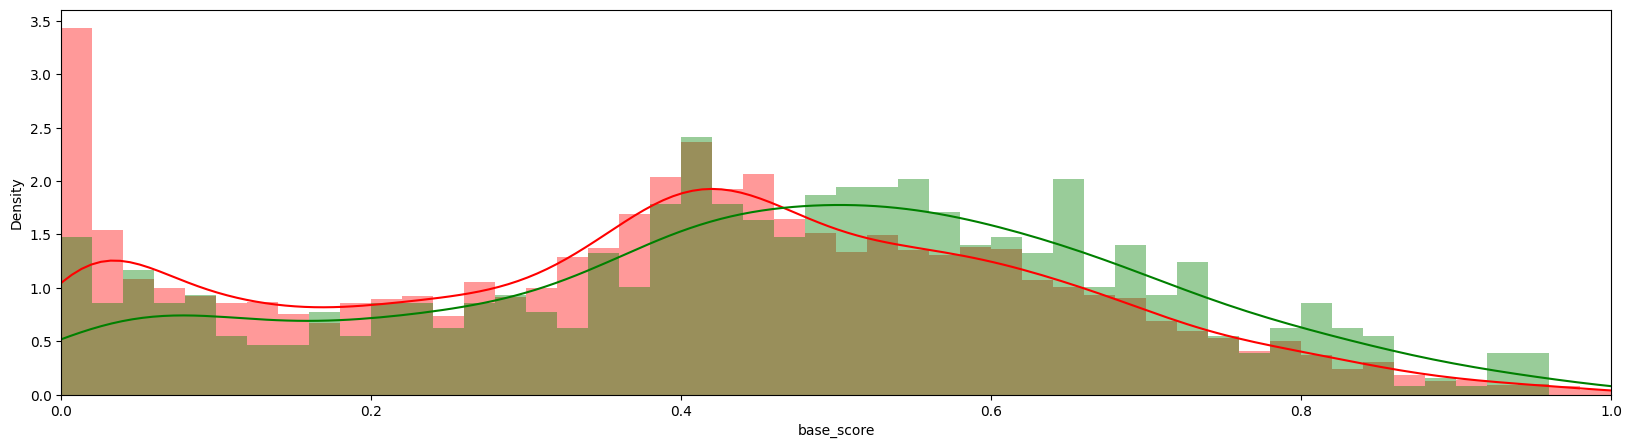

In [58]:
plt.figure(figsize=(20, 5))
sns.distplot(results.loc[((results["y_true"] == 0)), "base_score"], bins=[i/50. for i in range(51)], color="red")
sns.distplot(results.loc[((results["y_true"] == 1)), "base_score"], bins=[i/50. for i in range(51)], color="green")
plt.xlim([0, 1])
plt.show()

## weight

/home/juing/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/juing/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


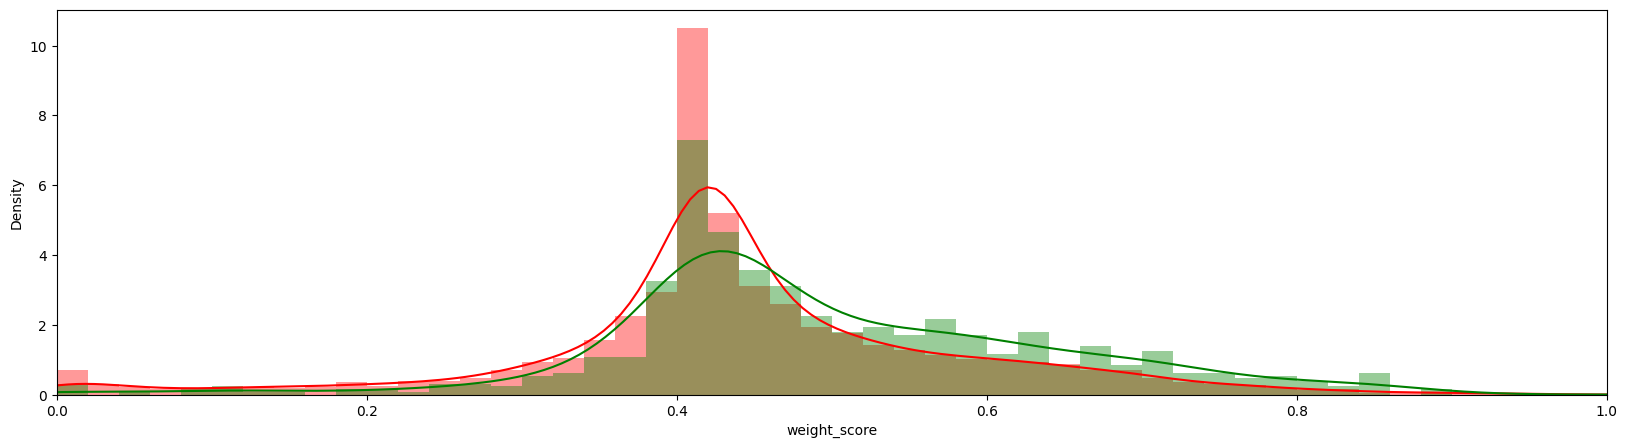

In [59]:
plt.figure(figsize=(20, 5))
sns.distplot(results.loc[((results["y_true"] == 0)), "weight_score"], bins=[i/50. for i in range(51)], color="red")
sns.distplot(results.loc[((results["y_true"] == 1)), "weight_score"], bins=[i/50. for i in range(51)], color="green")
plt.xlim([0, 1])
plt.show()

---